# Tutorial 28: Hierarchical Clustering and Networks

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  25 of 25 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0256%,0.4057%,0.4036%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1954%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7538%,-0.1730%,0.2410%,1.3735%,-1.0857%
2016-01-06,-11.4863%,-1.5879%,0.2412%,-1.7557%,-0.7727%,-1.2474%,-0.1735%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5647%,0.3108%,-1.0155%,-0.7653%,-3.0049%,-0.9034%,-2.9144%
2016-01-07,-5.1389%,-4.1921%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2207%,-0.8856%,-4.6058%,-2.5394%,...,-2.2066%,-3.0309%,-1.0411%,-3.1557%,-1.6148%,-0.2700%,-2.2845%,-2.0570%,-0.5492%,-3.0020%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5706%,-1.6402%,-1.7642%,-0.1649%,...,-0.1538%,-1.1366%,-0.7308%,-0.1449%,0.0895%,-3.3839%,-0.1117%,-1.1387%,-0.9719%,-1.1254%
2016-01-11,-4.3384%,0.1692%,-1.6851%,-1.0215%,0.0915%,-1.1791%,0.5674%,0.5288%,0.6616%,0.0330%,...,1.6436%,0.0000%,0.9869%,-0.1450%,1.2224%,1.4570%,0.5367%,-0.4607%,0.5799%,-1.9919%


## 2. Comparing Linkage Methods using Dendrograms and Two Difference Gap Statistic for Optimal Number of Clusters

[]

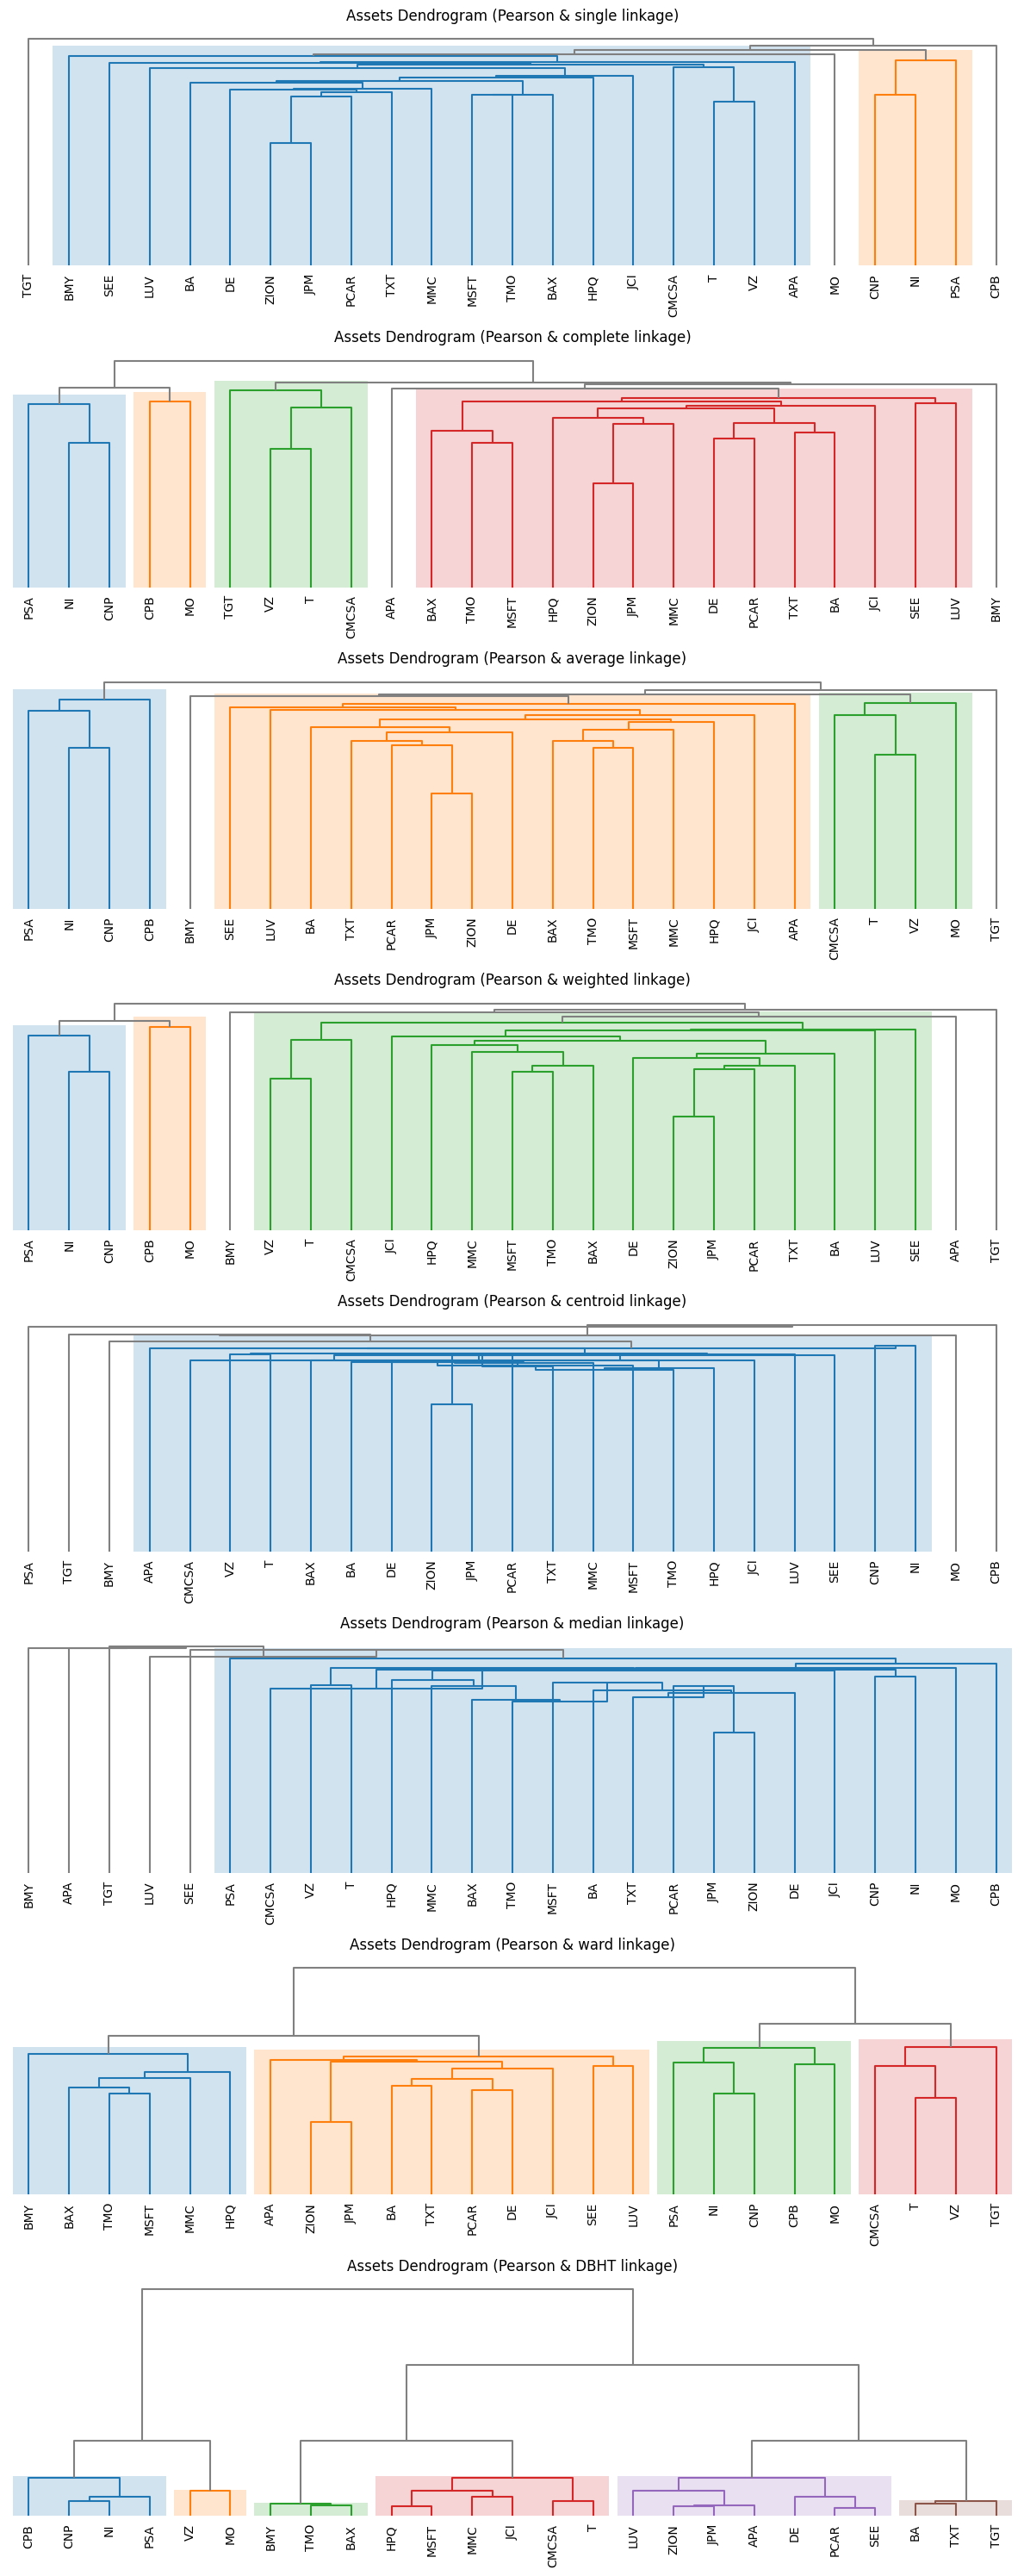

In [4]:
import matplotlib.pyplot as plt
import riskfolio as rp

# Comparison of several linkages methods

linkages = ['single','complete','average','weighted',
            'centroid', 'median', 'ward','DBHT']

fig, ax = plt.subplots(len(linkages), 1, figsize=(12, 30))
ax = np.ravel(ax)

j = 0
for i in linkages:
    ax[j] = rp.plot_dendrogram(returns=Y,
                               codependence='pearson',
                               linkage=i,
                               # opt_k_method="twodiff",
                               k=None,
                               max_k=10,
                               leaf_order=True,
                               ax=ax[j])
    j += 1
    
plt.plot()

위의 차트에서 DBHT와 Ward 연결 방식이 더 나은 계층적 구조를 구축하는 것을 볼 수 있습니다. 또한, 두 방법 모두 자산을 클러스터로 더 잘 분류하는 것 같습니다.

### 상세 설명:

- **DBHT (Dominant Set Hierarchical Clustering)**:
  - DBHT는 계층적 클러스터링 방법 중 하나로, 자산 간의 상관관계를 기반으로 클러스터를 형성합니다.
  - DBHT는 데이터의 지배적인 패턴을 찾아내고 이를 기반으로 클러스터를 구성하여 자산을 효과적으로 분류합니다.
  
- **Ward 연결 방식**:
  - Ward 연결 방식은 클러스터 간의 분산의 합을 최소화하는 계층적 클러스터링 방법입니다.
  - 이 방법은 클러스터 내의 동질성을 최대화하고, 클러스터 간의 차이를 최소화하는 것을 목표로 합니다.
  
위의 차트에서 이 두 방법이 다른 연결 방식보다 자산을 더 잘 분류하는 것을 볼 수 있습니다. 이는 포트폴리오 최적화에서 중요한 역할을 할 수 있으며, 클러스터 내의 자산들이 비슷한 특성을 가지도록 합니다.

### 예제 코드 (위의 설명을 반영한 덴드로그램 생성)

아래는 DBHT와 Ward 연결 방식을 사용하여 덴드로그램을 생성하는 예제 코드입니다.

```python
import matplotlib.pyplot as plt
import riskfolio as rp
import numpy as np

# 예시 데이터 생성
np.random.seed(42)
Y = np.random.randn(100, 10)  # 100개의 샘플과 10개의 자산

# DBHT와 Ward 연결 방식
linkages = ['ward', 'DBHT']

fig, ax = plt.subplots(len(linkages), 1, figsize=(12, 15))
ax = np.ravel(ax)

j = 0
for i in linkages:
    rp.plot_dendrogram(returns=Y,
                       codependence='pearson',
                       linkage=i,
                       max_k=10,
                       leaf_order=True,
                       ax=ax[j])
    j += 1
    
plt.show()
```

### 코드 설명:
1. **예시 데이터 생성**: 예시 데이터 `Y`를 생성합니다. 이 데이터는 100개의 샘플과 10개의 자산으로 구성됩니다.
2. **DBHT와 Ward 연결 방식**: 두 가지 연결 방식을 사용하여 덴드로그램을 생성합니다.
3. **덴드로그램 플로팅**: `plot_dendrogram` 함수를 사용하여 덴드로그램을 생성하고, 이를 시각화합니다.

이 코드를 통해 DBHT와 Ward 연결 방식이 자산을 클러스터로 더 잘 분류하는지 확인할 수 있습니다. 시각적으로 더 나은 계층적 구조를 보여주는지 확인할 수 있으며, 이는 포트폴리오 최적화에 중요한 정보가 될 수 있습니다.

## 3. Comparing Linkage Methods using Dendrograms and Standarized Silhouette Index for Optimal Number of Clusters

[]

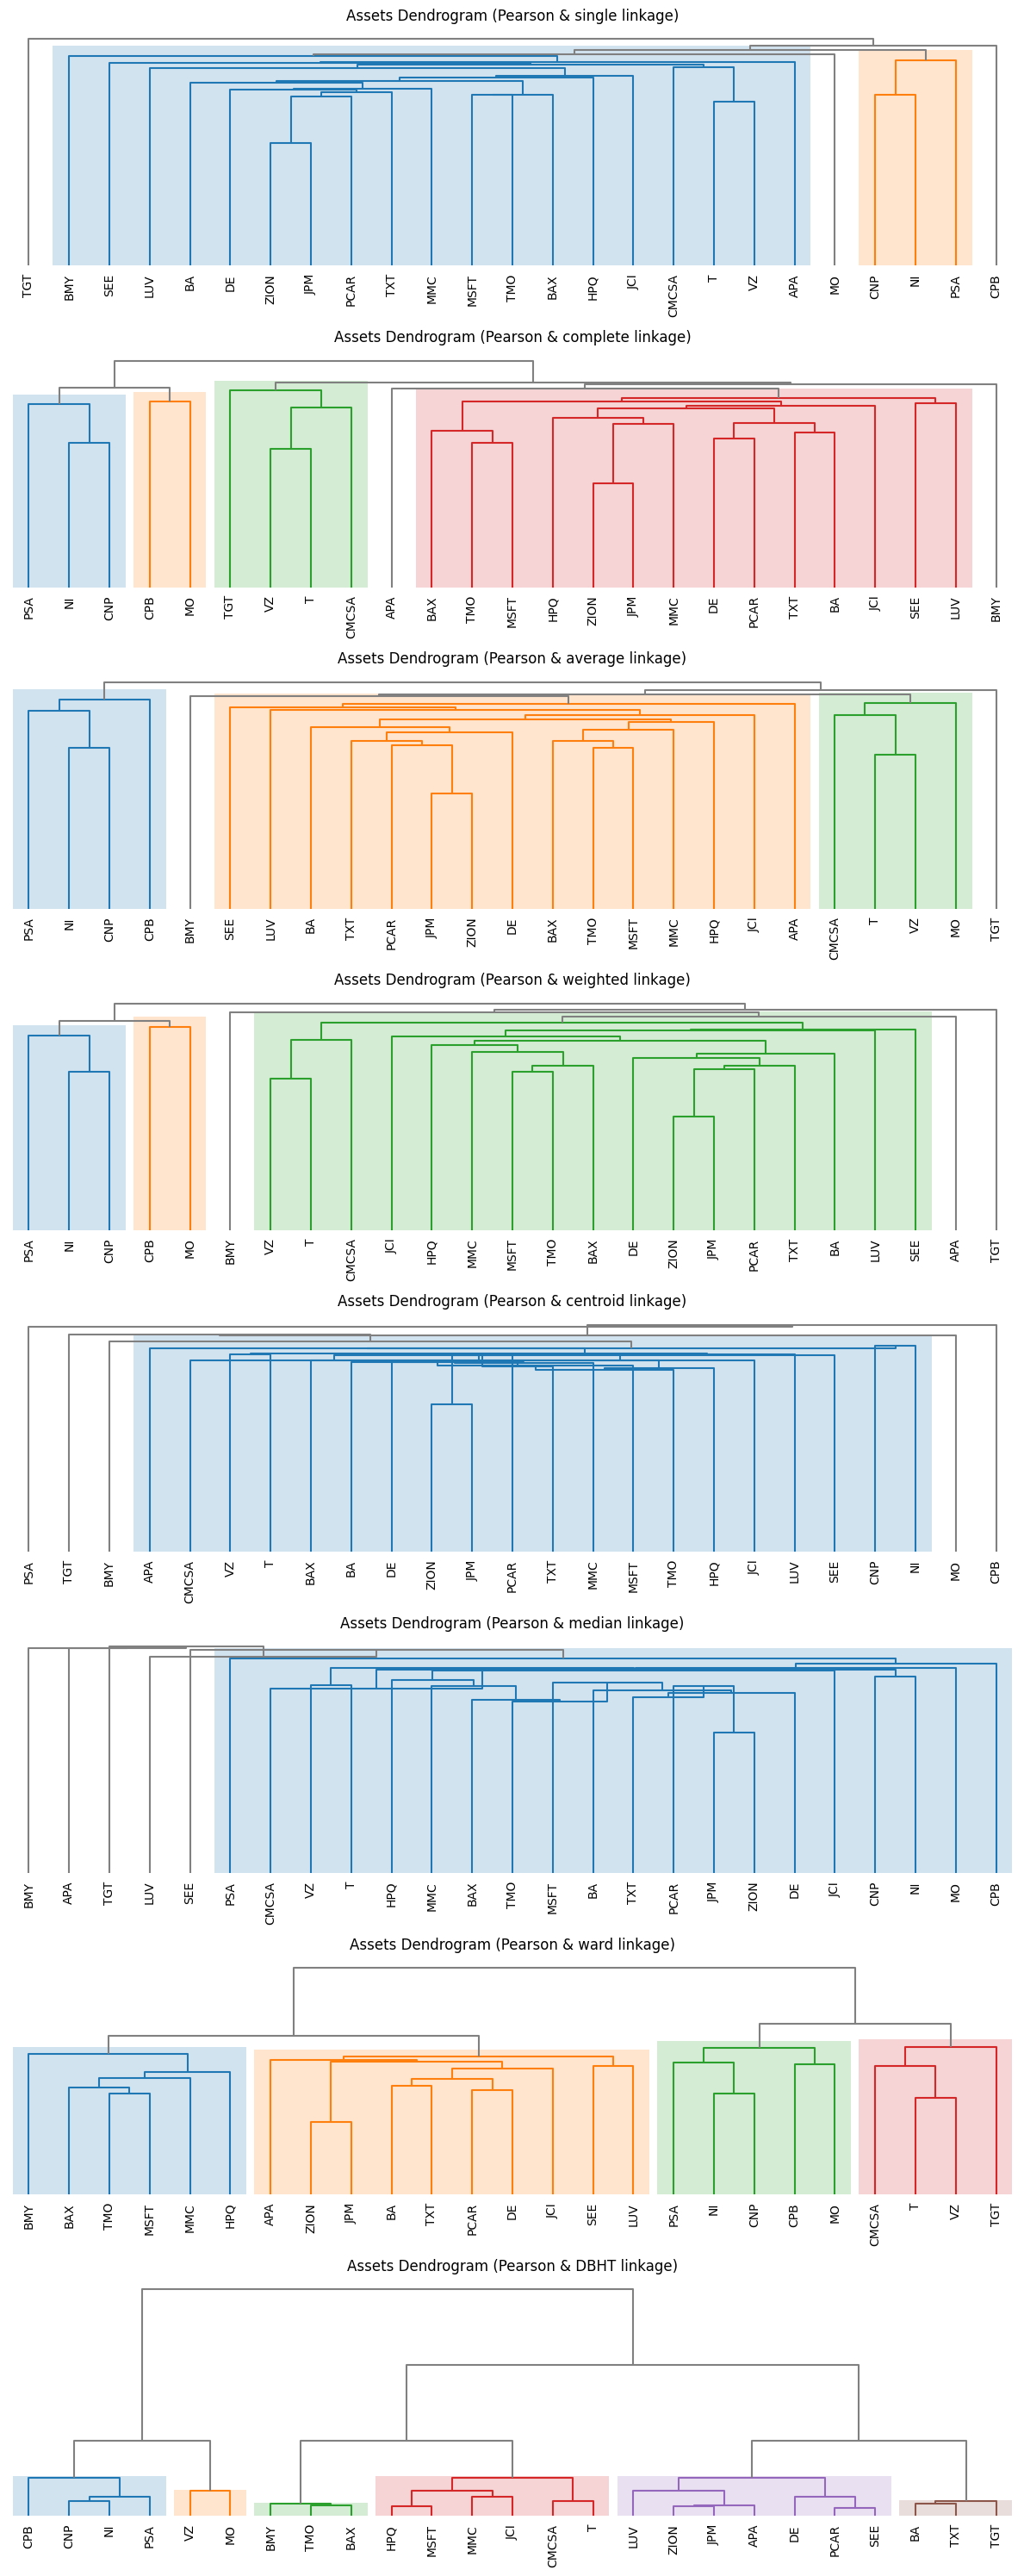

In [6]:
fig, ax = plt.subplots(len(linkages), 1, figsize=(12, 30))
ax = np.ravel(ax)

j = 0
for i in linkages:
    ax[j] = rp.plot_dendrogram(returns=Y,
                               codependence='pearson',
                               linkage=i,
                            #    opt_k_method="stdsil",
                               k=None,
                               max_k=10,
                               leaf_order=True,
                               ax=ax[j])
    j += 1
    
plt.plot()

## 4. Comparing Linkage Methods using Networks

자산 간의 관계를 덴드로그램 대신 네트워크를 사용하여 시각화하는 것이 더 나을 때가 있습니다. 이러한 유형의 플롯은 클러스터링 방법의 효과와 자산 간의 관계를 보다 명확하게 보여주는 데 도움이 됩니다.

### 네트워크 플롯을 사용한 시각화

네트워크 플롯은 자산 간의 관계를 노드와 엣지로 표현합니다. 노드는 자산을 나타내고, 엣지는 자산 간의 상관관계 또는 거리를 나타냅니다. 이를 통해 클러스터링 방법의 효과를 시각적으로 평가할 수 있습니다.

### 예제 코드

아래는 네트워크 플롯을 사용하여 자산 간의 관계를 시각화하는 예제 코드입니다. `networkx` 라이브러리를 사용하여 네트워크를 생성하고, `matplotlib`을 사용하여 시각화합니다.

```python
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# 예시 데이터 생성
np.random.seed(42)
Y = np.random.randn(100, 10)  # 100개의 샘플과 10개의 자산
asset_names = [f'Asset {i}' for i in range(1, 11)]
returns = pd.DataFrame(Y, columns=asset_names)

# 상관 행렬 계산
corr_matrix = returns.corr()

# 네트워크 생성
G = nx.Graph()

# 노드 추가
for asset in asset_names:
    G.add_node(asset)

# 엣지 추가 (상관계수가 일정 임계값 이상인 경우에만 추가)
threshold = 0.5
for i in range(len(asset_names)):
    for j in range(i+1, len(asset_names)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            G.add_edge(asset_names[i], asset_names[j], weight=corr_matrix.iloc[i, j])

# 네트워크 플롯
pos = nx.spring_layout(G)  # 노드 위치를 스프링 레이아웃으로 설정
plt.figure(figsize=(12, 12))

# 노드 그리기
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')

# 엣지 그리기 (엣지의 굵기는 상관계수의 절대값에 비례)
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight']*5 for (u, v, d) in edges])

# 노드 라벨 그리기
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

plt.title('Asset Relationships Network')
plt.show()
```

### 코드 설명

1. **데이터 생성**: 예시 데이터를 생성하고 자산 이름을 설정합니다.
2. **상관 행렬 계산**: 자산 간의 상관 행렬을 계산합니다.
3. **네트워크 생성**:
    - `networkx` 라이브러리를 사용하여 네트워크 객체 `G`를 생성합니다.
    - 자산을 노드로 추가합니다.
    - 상관 계수가 일정 임계값(threshold) 이상인 경우에만 엣지를 추가합니다.
4. **네트워크 플롯**:
    - `nx.spring_layout`을 사용하여 노드의 위치를 설정합니다.
    - 노드를 그립니다.
    - 엣지를 그립니다 (엣지의 굵기는 상관 계수의 절대값에 비례).
    - 노드 라벨을 그립니다.
    - 플롯을 시각화합니다.

이 네트워크 플롯은 자산 간의 관계를 시각적으로 보여주며, 클러스터링 방법의 효과를 평가하는 데 유용합니다. 상관 계수가 높은 자산들은 엣지로 연결되어 가까운 거리에 위치하게 됩니다.

[]

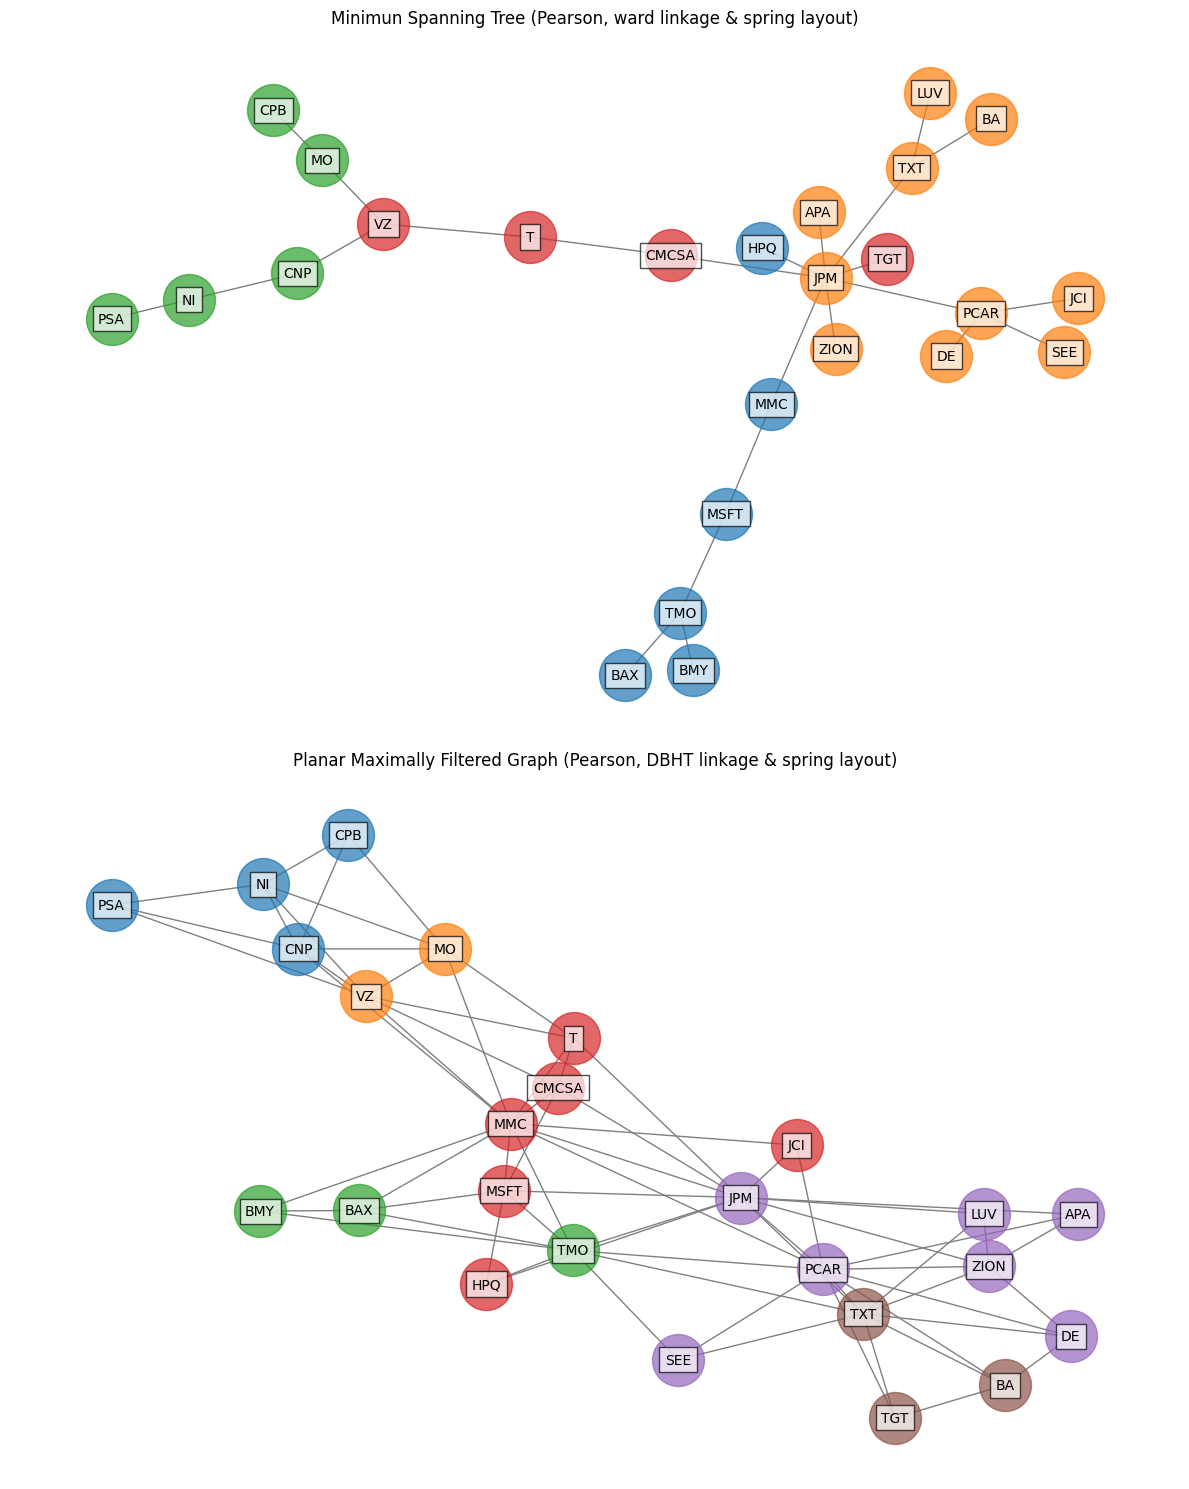

In [8]:
# Comparison of two Network Graphs

linkages = ['ward','DBHT']

fig, ax = plt.subplots(len(linkages), 1, figsize=(12, 15))
ax = np.ravel(ax)

j = 0
for i in linkages:
    ax[j] = rp.plot_network(returns=Y,
                            codependence="pearson",
                            linkage=i,
                            # opt_k_method="twodiff",
                            k=None,
                            max_k=10,
                            leaf_order=True,
                            kind='spring',
                            seed=0,
                            ax=ax[j])
    j += 1
    
plt.plot()